import pandas as pd
import numpy as np

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r'spam.csv', encoding="latin-1" )


In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3588,ham,I've sent my wife your text. After we buy them...,NaN,NaN,NaN
1278,ham,Can i meet Ì_ at 5.. As 4 where depends on whe...,NaN,NaN,NaN
532,ham,Gudnite....tc...practice going on,NaN,NaN,NaN
470,spam,okmail: Dear Dave this is your final notice to...,NaN,NaN,NaN
596,ham,Gud mrng dear have a nice day,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [8]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evalution
# 6. Imporvments
# 7. Websites
# 8. Deploy

## 1. Data Cleanning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.rename(columns={'v1':'Target','v2':'Message'},inplace=True )

In [12]:
df.head(5)

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [14]:
df['Target'] = encoder.fit_transform(df['Target'])
df.sample(5)

,Target,Message
1063,1,We have new local dates in your area - Lots of...
5558,0,"Sorry, I'll call later"
4120,0,Yunny... I'm goin to be late
4577,1,Urgent! call 09066350750 from your landline. Y...
2510,0,Yunny i'm walking in citylink now Ì_ faster co...


In [15]:
# check for the null values
df.isnull().sum()

Target     0
Message    0
dtype: int64

In [16]:
# check for the duplicates values
df['Message'].duplicated().sum()

np.int64(403)

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(5169, 2)

## 2. EDA

In [20]:
df.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

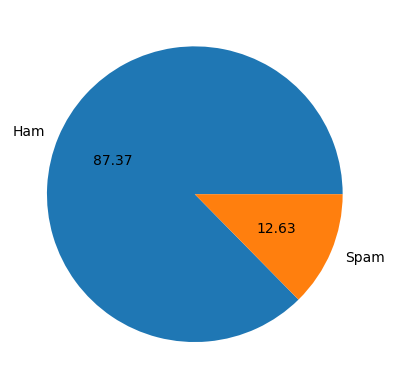

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['Ham', 'Spam'], autopct='%0.2f' )
plt.show()

In [23]:
# Data is Imblanced

In [24]:
import nltk

In [25]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\M.Hafeez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# num of character
df['num_character'] = df['Message'].apply(len)
df.head(5)

,Target,Message,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\M.Hafeez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\M.Hafeez/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\M.Hafeez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M.Hafeez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
# Function to count the number of words in a message
def count_words(text):
    words = text.split()  # Split the text by whitespace
    return len(words)

# Assume df is your DataFrame and 'Message' is the column with the text data
# Apply the function to count the number of words
df['num_words'] = df['Message'].apply(count_words)
df.head(5)


,Target,Message,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [29]:
# For Spam messages
df[df['Target'] == 1][['num_character','num_words']].describe()

,num_character,num_words
count,653.000000,653.000000
mean,137.891271,23.681470
std,30.137753,5.967672
min,13.000000,2.000000
25%,132.000000,22.000000
50%,149.000000,25.000000
75%,157.000000,28.000000
max,224.000000,35.000000


In [30]:
# For Ham messages
df[df['Target']==0][['num_character','num_words']].describe()

,num_character,num_words
count,4516.000000,4516.000000
mean,70.459256,14.134632
std,56.358207,11.116240
min,2.000000,1.000000
25%,34.000000,7.000000
50%,52.000000,11.000000
75%,90.000000,18.000000
max,910.000000,171.000000


In [31]:
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

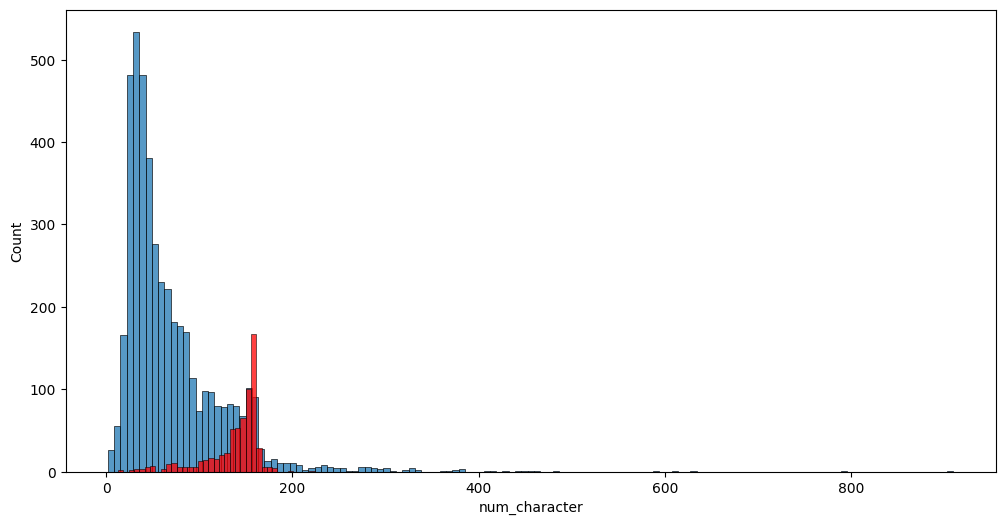

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_character'])
sns.histplot(df[df['Target']==1]['num_character'], color= 'red')

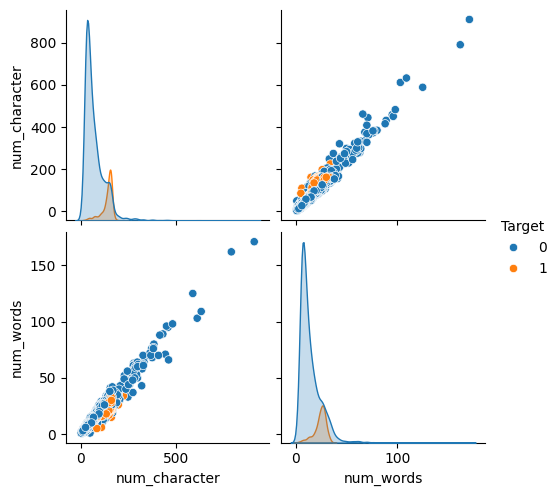

In [33]:
sns.pairplot(df,hue='Target')

In [34]:
df.head()

,Target,Message,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [35]:
new_df = df[['Target','num_character','num_words',]]
new_df.head()

,Target,num_character,num_words
0,0,111,20
1,0,29,6
2,1,155,28
3,0,49,11
4,0,61,13


<Axes: >

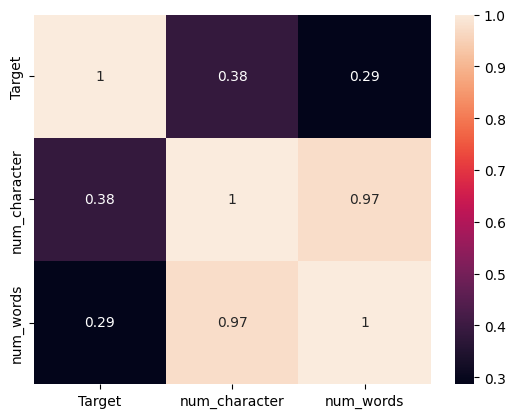

In [36]:
sns.heatmap(new_df.corr(), annot=True)

<h2><h2>Data Preprocessing Steps</h2> <ol> <li>Lower case</li> <li>Tokenization</li> <li>Removing special characters</li> <li>Removing stopwords and punctuation</li> <li>Stemming</li> </ol>

In [37]:
df.head(3)

,Target,Message,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28


In [38]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\M.Hafeez/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [39]:

# Download stopwords
import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stopwords.words('english')

# Download the  stemming fuction
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

# Download the punctions mark
import string
string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M.Hafeez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    # word tokenize
    text = nltk.word_tokenize(text)
    # Removeing special characters
    y = []
    for i in text:
        if i.isalnum():
         y.append(i)
# Removing stopwords and puncation marks
    text = y[:]
    y.clear()

    for i  in text:
     if i not in stopwords.words('english') and i not in string.punctuation:
       y.append(i)

# performing stemming
    text = y[:]
    y.clear()


    for i in text:
     y.append(ps.stem(i))


    return " ".join(y)


In [41]:
transform_text('I love the Youtube lectures about machine leraning. How about u?')

'love youtub lectur machin leran u'

In [42]:
df['transform_text'] = df['Message'].apply(transform_text)

In [43]:
df.head(5)

,Target,Message,num_character,num_words,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,nah think goe usf live around though


In [44]:
# word cloud of spam message
from wordcloud import WordCloud
wc = WordCloud(width=800, height=600, random_state=21, min_font_size= 10, background_color='white')

In [45]:
spam_wc = wc.generate(df[df['Target']==1]['transform_text'].str.cat(sep=""))

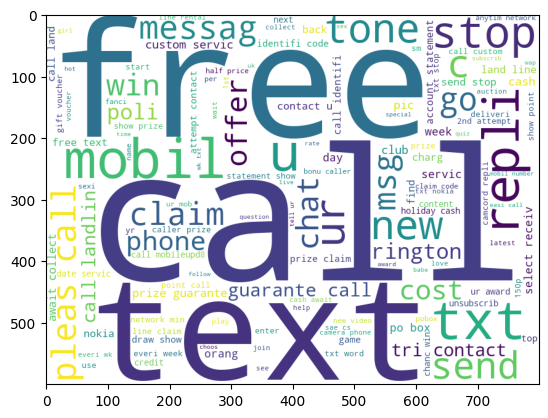

In [46]:
plt.imshow(spam_wc)

In [47]:
ham_wc = wc.generate(df[df['Target']==0]['transform_text'].str.cat(sep=""))

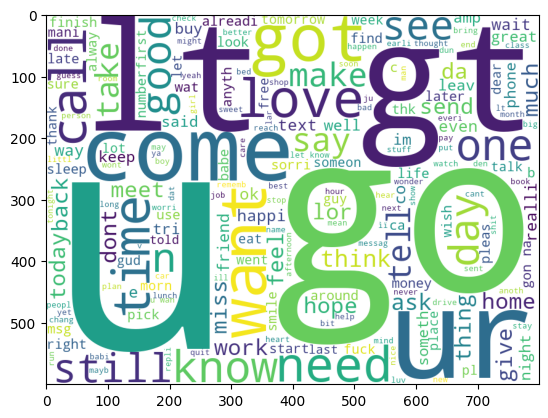

In [48]:
plt.imshow(ham_wc)

<h2>Model Building

<h3>Techniques
<h5>Bags of Words
<h5>df/idf
<h5>word to vect

In [49]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=1000)

In [50]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [51]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
X.shape

(5169, 1000)

In [53]:
y = df['Target'].values

In [54]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [55]:
from sklearn.model_selection import train_test_split


In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [58]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [59]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.7804642166344294
[[680 209]
 [ 18 127]]
0.37797619047619047


In [60]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738878143133463
[[885   4]
 [ 23 122]]
0.9682539682539683


In [61]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.97678916827853
[[883   6]
 [ 18 127]]
0.9548872180451128


In [62]:
#Tf/idf --> MNB

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [64]:
svc = SVC(kernel= 'sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)



In [65]:
clfs = {
    'SVC' : svc,
    'KN': knc,
    'NB': mnb,
    'DT' : dtc,
    'RF' : rfc,
    'AdaBoost' : abc,
    }


In [66]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy= accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [67]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print('For', name)
    print('Accuracy:', current_accuracy)
    print('Precision:', current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy: 0.9748549323017408
Precision: 0.9541984732824428
For KN
Accuracy: 0.9158607350096711
Precision: 0.9833333333333333
For NB
Accuracy: 0.9738878143133463
Precision: 0.9682539682539683
For DT
Accuracy: 0.9342359767891683
Precision: 0.8598130841121495
For RF
Accuracy: 0.9729206963249516
Precision: 0.9606299212598425


c:\Users\M.Hafeez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy: 0.9535783365570599
Precision: 0.8702290076335878


In [68]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accracy':accuracy_scores,'Precission':precision_scores})

In [69]:
performance_df

,Algorithm,Accracy,Precission
0,SVC,0.974855,0.954198
1,KN,0.915861,0.983333
2,NB,0.973888,0.968254
3,DT,0.934236,0.859813
4,RF,0.972921,0.960630
5,AdaBoost,0.953578,0.870229


In [70]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [71]:
###########################################################################################################33

In [72]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [73]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [74]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'